<a href="https://colab.research.google.com/github/midhunpk40/ml-internship-projects/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.listdir()


['.config', 'diabetes.csv', 'sample_data']

In [3]:
import pandas as pd

df = pd.read_csv("/content/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


day1


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("diabetes.csv")

# Inspect dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)

print("\nFirst 5 Rows:")
print(df.head())

print("\nLast 5 Rows:")
print(df.tail())

# Identify features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

print("\nFeatures (X):")
print(X.columns)

print("\nTarget (y): Outcome")




Dataset Shape: (768, 9)

Column Names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

 

day2



Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Zero Values Count:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.

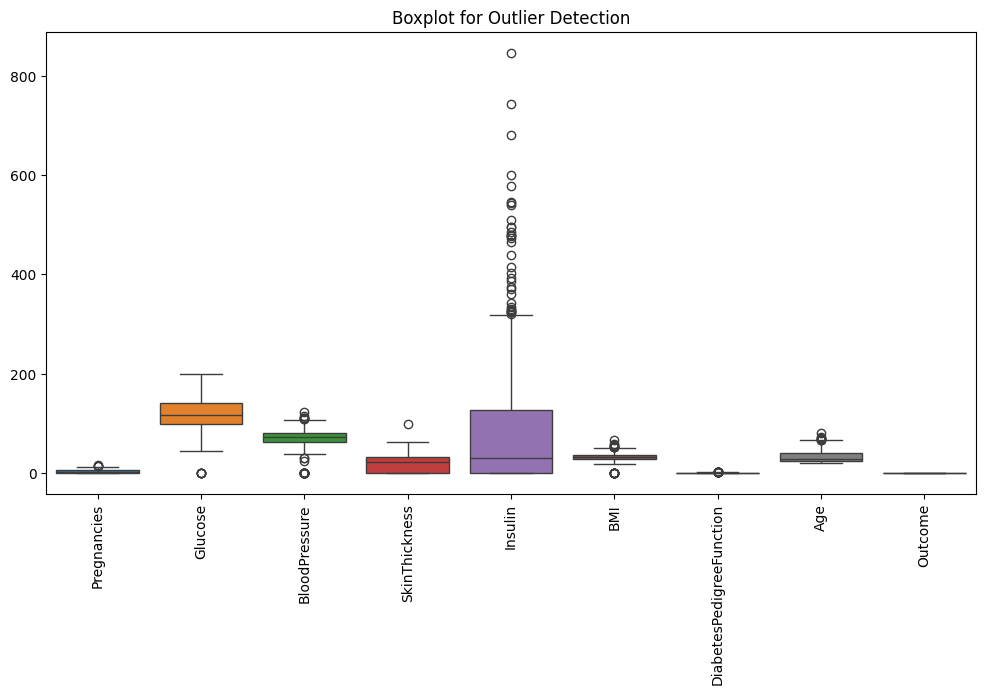

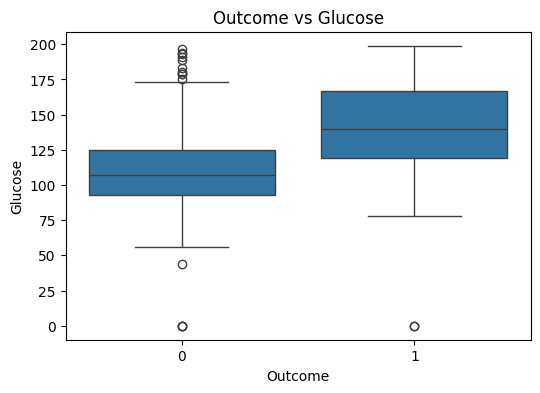

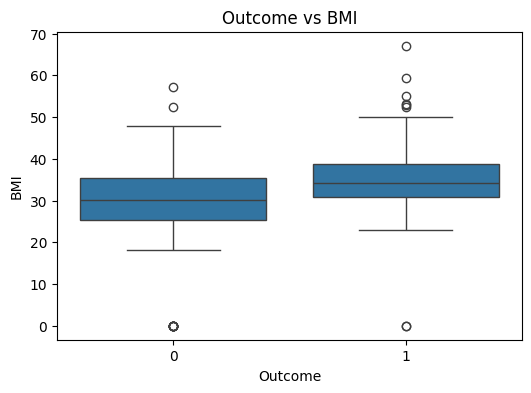

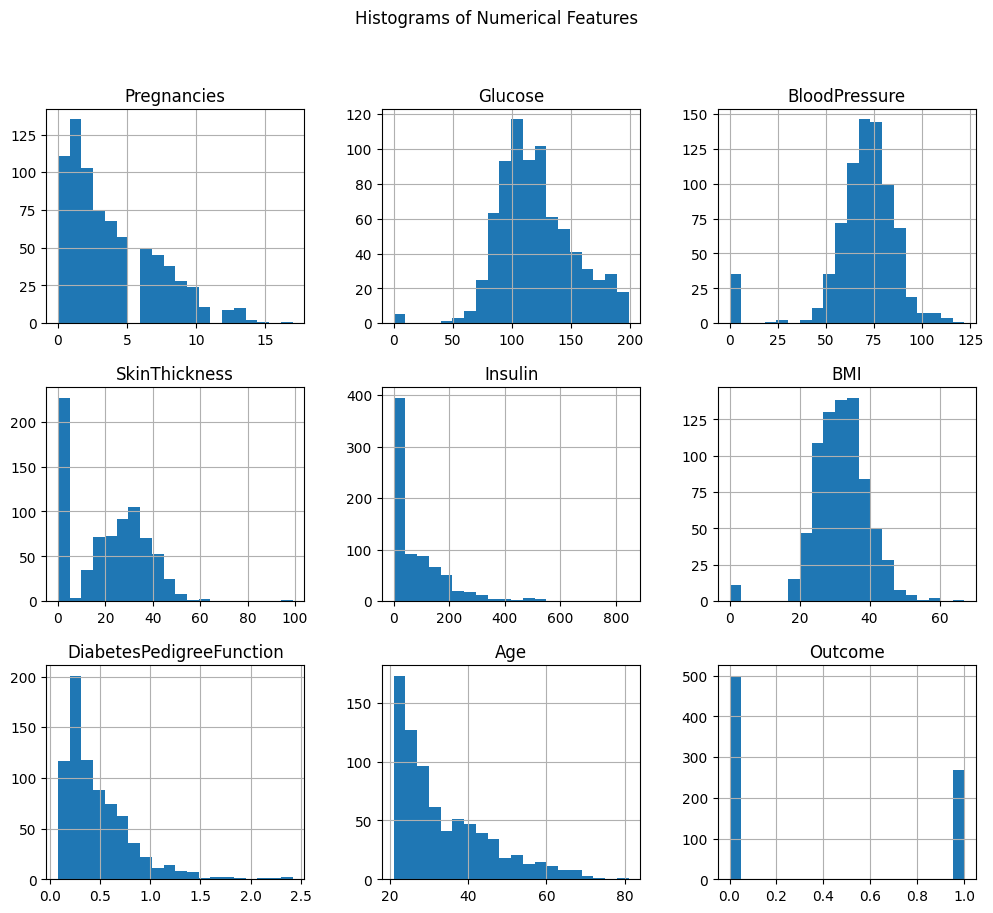

In [5]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check zero values (important for medical data)
print("\nZero Values Count:")
print((df == 0).sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


# Outlier Detection using Boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


# 2. Relationship between features and target


# Outcome vs Glucose
plt.figure(figsize=(6, 4))
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Outcome vs Glucose")
plt.show()

# Outcome vs BMI
plt.figure(figsize=(6, 4))
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("Outcome vs BMI")
plt.show()


# 3. Histograms for numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()


day3


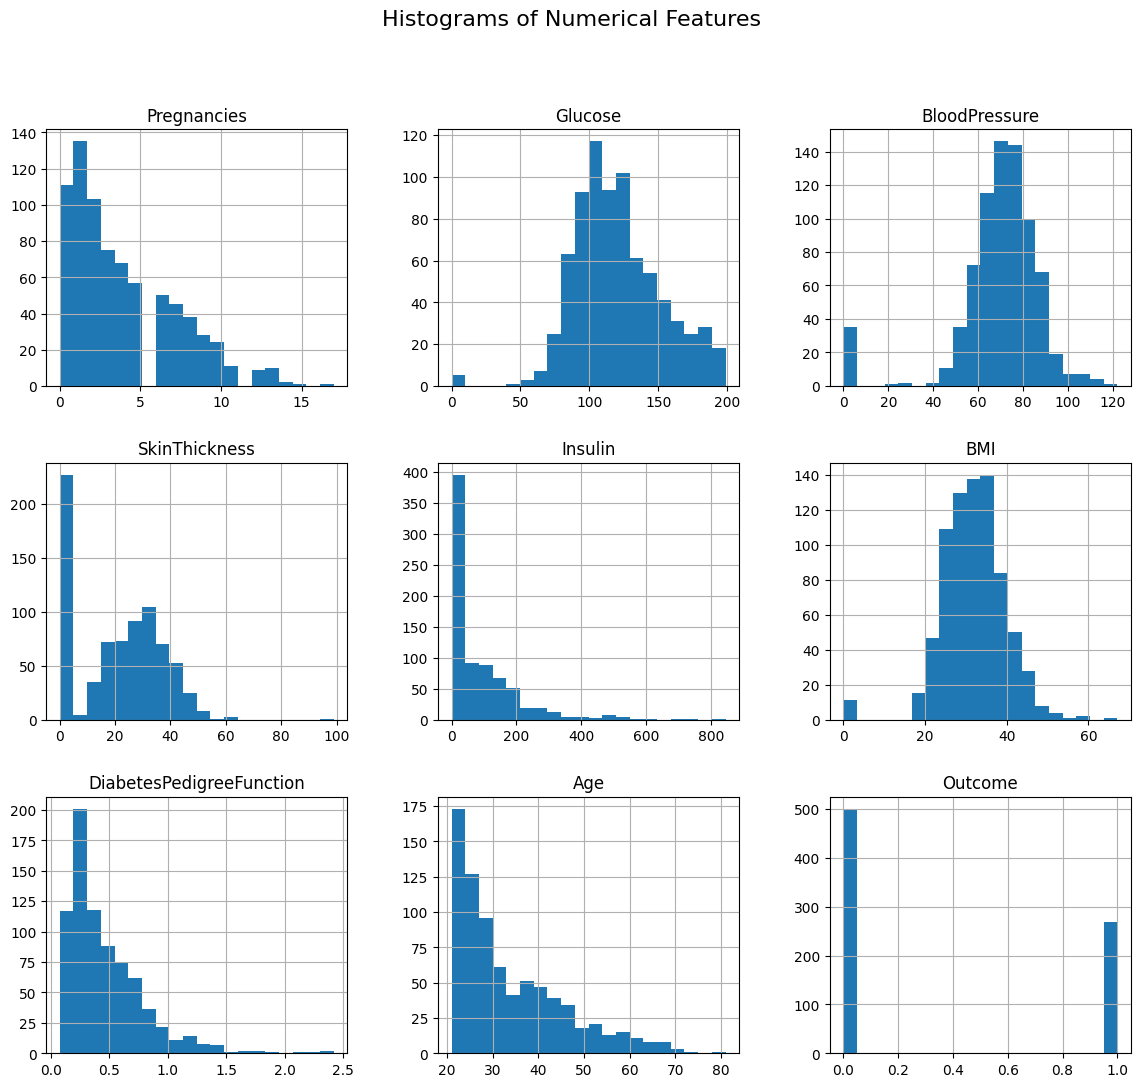


Skewness of Numerical Features:
Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


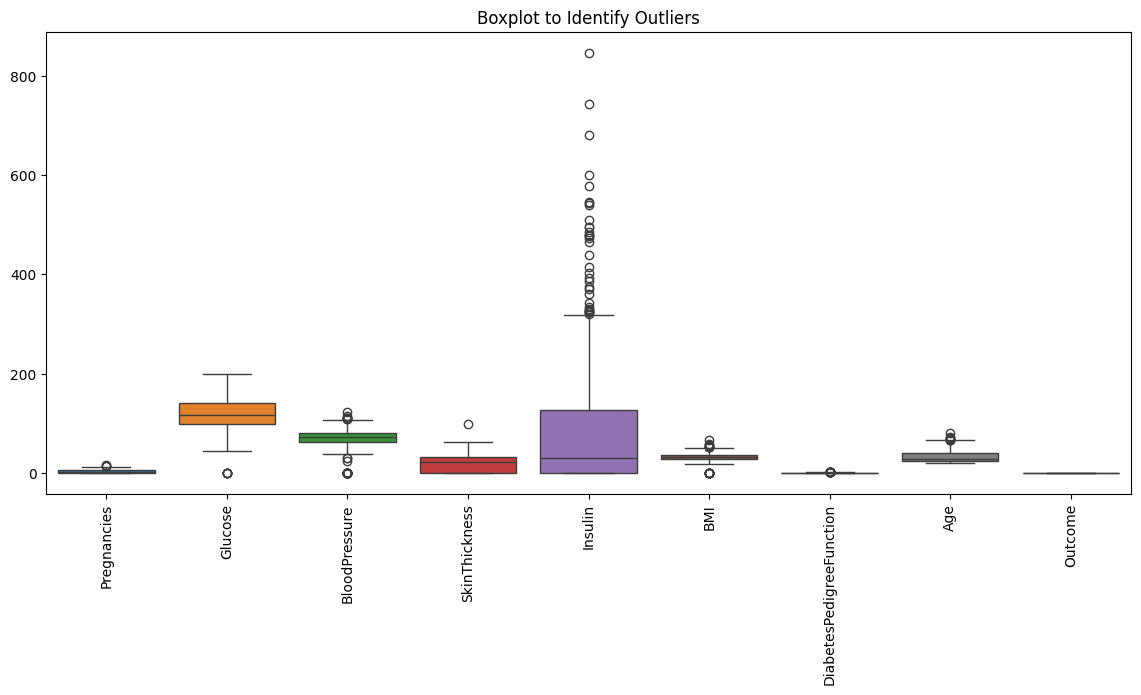

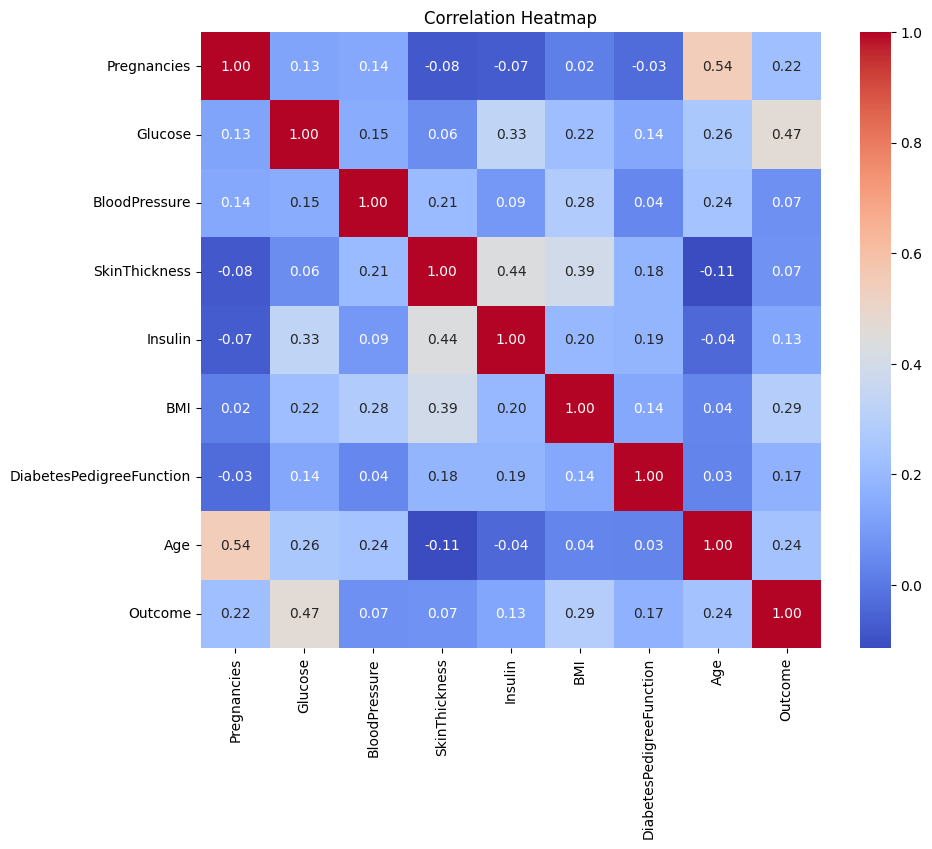

In [6]:

# 1. Histograms for numerical features

df.hist(figsize=(14, 12), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


# 2. Analyze data distribution & skewness

print("\nSkewness of Numerical Features:")
print(df.skew())


# 3. Identify outliers using boxplots

plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot to Identify Outliers")
plt.show()


# 4. Correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


day4


In [7]:


# 1. Replace invalid zero values with NaN

cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

print("\nMissing values after replacing zeros with NaN:")
print(df.isnull().sum())


# 2. Handle missing values (Median)

for col in cols_with_zero:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


# 3. Verify cleaned data

print("\nSummary Statistics After Cleaning:")
print(df.describe())


# 4. Remove duplicates / inconsistencies

print("\nDuplicate rows before removal:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicate rows after removal:", df.duplicated().sum())



Missing values after replacing zeros with NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Summary Statistics After Cleaning:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060

/tmp/ipython-input-3524091882.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


day4


In [8]:

# Replace invalid zero values with NaN for medical features
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Handle missing values using median to reduce effect of outliers
for col in cols_with_zero:
    df[col].fillna(df[col].median(), inplace=True)

# Verify cleaned data by checking missing values
print("Missing values after cleaning:\n", df.isnull().sum())

# Check duplicate records before removal
print("Duplicates before removal:", df.duplicated().sum())

# Remove duplicate rows to maintain data consistency
df.drop_duplicates(inplace=True)

# Confirm duplicates are removed
print("Duplicates after removal:", df.duplicated().sum())


Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Duplicates before removal: 0
Duplicates after removal: 0


/tmp/ipython-input-3033269113.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


day5


In [9]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target variable
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions using Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



day 6


KNN Accuracy: 0.7337662337662337
K=1, Accuracy=0.6558441558441559
K=2, Accuracy=0.6623376623376623
K=3, Accuracy=0.7077922077922078
K=4, Accuracy=0.7207792207792207
K=5, Accuracy=0.7337662337662337
K=6, Accuracy=0.7142857142857143
K=7, Accuracy=0.7142857142857143
K=8, Accuracy=0.7337662337662337
K=9, Accuracy=0.7272727272727273
K=10, Accuracy=0.7597402597402597
Decision Tree Accuracy: 0.7142857142857143


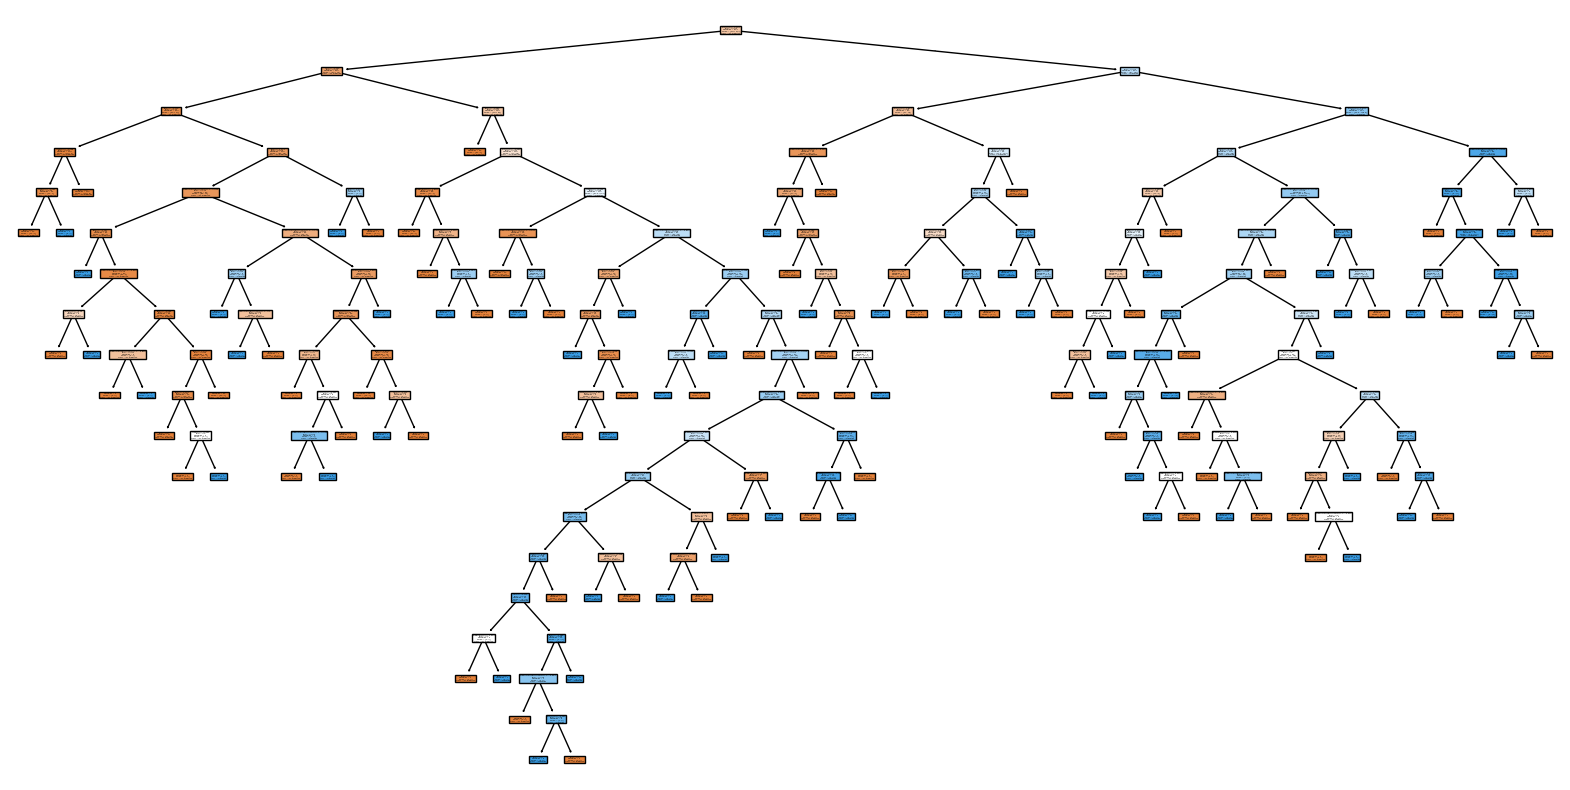

In [10]:


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
# KNN Mode
# Train KNN model with initial K value
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions using KNN
y_pred_knn = knn.predict(X_test)

# Evaluate KNN model performance
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

# Tune K value to find optimal neighbors
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"K={k}, Accuracy={accuracy_score(y_test, knn.predict(X_test))}")
# Decision Tree Mode
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions using Decision Tree
y_pred_dt = dt.predict(X_test)

# Evaluate Decision Tree performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Visualize Decision Tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


day7


In [11]:

# Store accuracy scores of all models
model_accuracy = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt)
}

# Display comparison of model performances
print("Model Accuracy Comparison:")
for model, acc in model_accuracy.items():
    print(f"{model}: {acc}")

# Select best performing model based on accuracy
best_model = max(model_accuracy, key=model_accuracy.get)
print("Best Model:", best_model)

# Final conclusion of the project
print("""
Conclusion:
Logistic Regression, KNN, and Decision Tree models were trained and evaluated.
The best model was selected based on accuracy.
The cleaned and scaled dataset significantly improved model performance.
""")


Model Accuracy Comparison:
Logistic Regression: 0.7532467532467533
KNN: 0.7337662337662337
Decision Tree: 0.7142857142857143
Best Model: Logistic Regression

Conclusion:
Logistic Regression, KNN, and Decision Tree models were trained and evaluated.
The best model was selected based on accuracy.
The cleaned and scaled dataset significantly improved model performance.

